# Preliminary Data Wrangling and Exploratory Data Analysis

Description of data:
This dataset contains labeled food images with 101 different categories. For each category there is 1,000 training images, making the total amount of images 101,000.

This document will explore the dataset and will make preliminary insights about the dataset. The goal is to build a model that will be able to identify user generated photo's within these categories. 

# Import necessary packages and load .json

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #pyplot

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from glob import glob
from IPython.display import display, Image


In [4]:
# read the entire file into a python array
with open('data/meta/test.json', 'r') as f:
    test_data = f.readlines()

# read the entire file into a python array
with open('data/meta/train.json', 'r') as f:
    train_data = f.readlines()    
    
# remove the trailing "\n" from each line
test_data = map(lambda x: x.rstrip(), test_data)
test_data_json_str = "[" + ','.join(test_data) + "]"

# remove the trailing "\n" from each line
train_data = map(lambda x: x.rstrip(), train_data)
train_data_json_str = "[" + ','.join(train_data) + "]"

# # now, load it into pandas
train_df = pd.read_json(train_data_json_str)
test_df = pd.read_json(test_data_json_str)

### Random Samples Per Label

In [5]:
def gather_image_data(root_dir, food_dir):
    files_in_folder = os.listdir(os.path.join(root_dir,food_dir))
    random_image = np.random.choice(files_in_folder)
    return plt.imread(os.path.join(root_dir,food_dir,random_image))

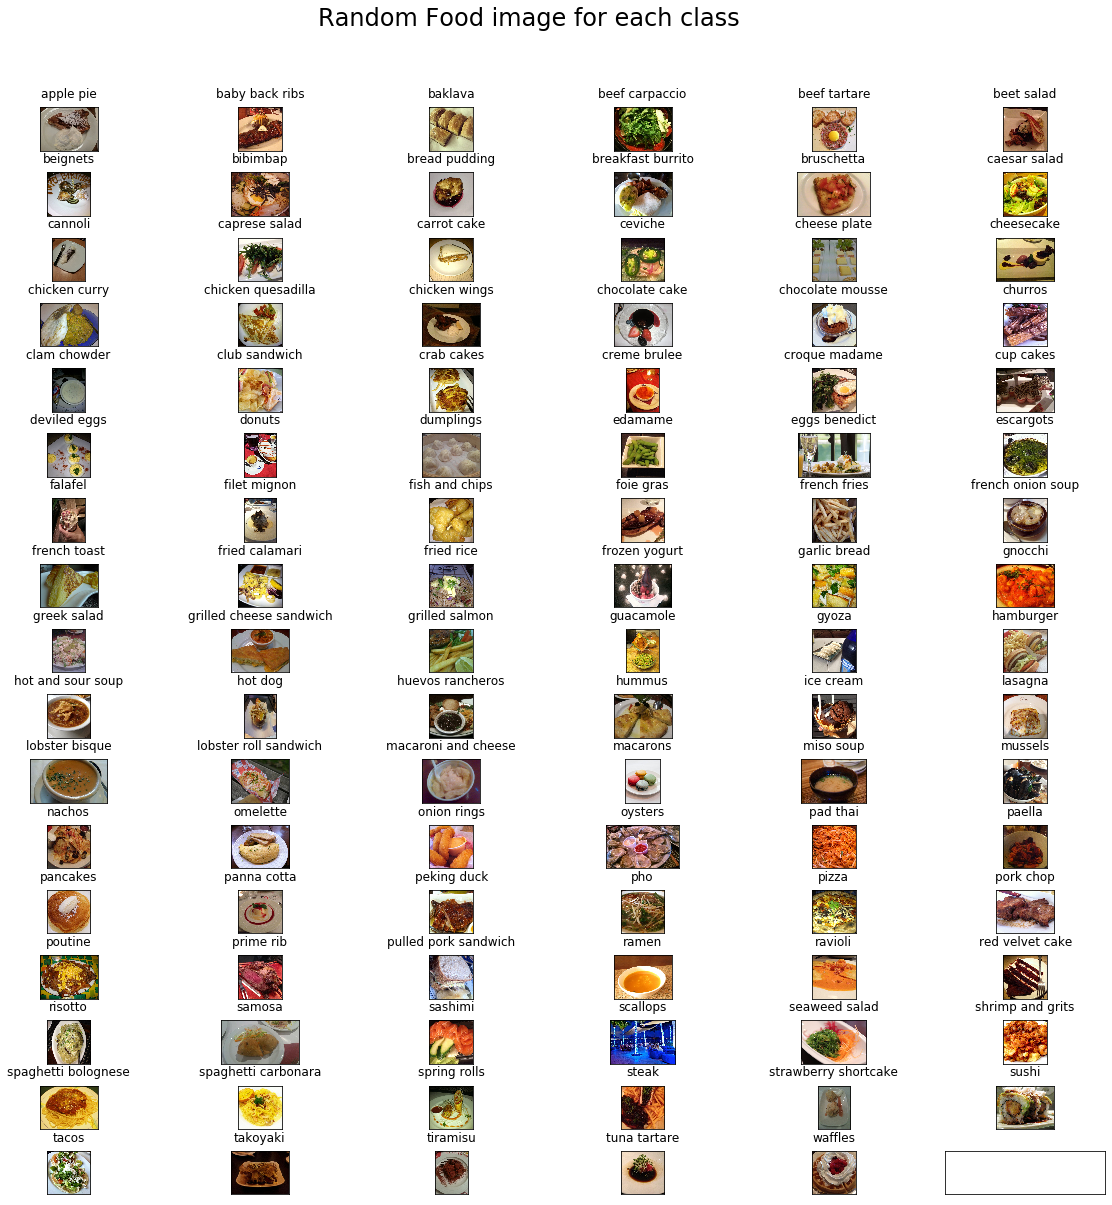

In [6]:
root_dir = 'data/images'
row = 17
col = 6

fig, ax = plt.subplots(row,col,figsize=(20,20))
fig.suptitle("Random Food image for each class", y=.95, fontsize=24)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(row):
    for j in range(col):
        try:
            food_dir = sorted_food_dirs[i * col + j]
        except:
            break
        img = gather_image_data(root_dir,food_dir)
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_dir.replace("_"," "), pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'spaghetti bolognese')

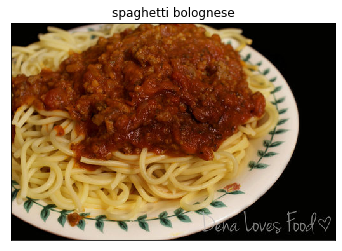

In [7]:
root_dir = 'data/images'
# Select a food directory from above to display images from it
food_dir = 'spaghetti bolognese'.replace(" ","_")

files_in_folder = os.listdir(os.path.join(root_dir,food_dir))
random_image = np.random.choice(files_in_folder)
img = gather_image_data(root_dir,food_dir)
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(food_dir.replace("_"," "))

### Review JSON Data
It appears that the .json data is seperated by label with a list of file locations for the images.

In [8]:
train_df.head()

,apple_pie,baby_back_ribs,baklava,beef_carpaccio,beef_tartare,beet_salad,beignets,bibimbap,bread_pudding,breakfast_burrito,...,spaghetti_carbonara,spring_rolls,steak,strawberry_shortcake,sushi,tacos,takoyaki,tiramisu,tuna_tartare,waffles
0,"[apple_pie/1005649, apple_pie/1014775, apple_p...","[baby_back_ribs/1005293, baby_back_ribs/100710...","[baklava/1006121, baklava/1014880, baklava/102...","[beef_carpaccio/1011469, beef_carpaccio/101393...","[beef_tartare/1000431, beef_tartare/1005746, b...","[beet_salad/1003501, beet_salad/1005864, beet_...","[beignets/1000911, beignets/1002569, beignets/...","[bibimbap/1002297, bibimbap/1006709, bibimbap/...","[bread_pudding/1004499, bread_pudding/1004540,...","[breakfast_burrito/1000351, breakfast_burrito/...",...,"[spaghetti_carbonara/1005482, spaghetti_carbon...","[spring_rolls/1002160, spring_rolls/1003056, s...","[steak/1000205, steak/100135, steak/101312, st...","[strawberry_shortcake/1009217, strawberry_shor...","[sushi/100332, sushi/1005352, sushi/1012499, s...","[tacos/1002217, tacos/1005454, tacos/1007867, ...","[takoyaki/1002167, takoyaki/1002237, takoyaki/...","[tiramisu/1002946, tiramisu/100504, tiramisu/1...","[tuna_tartare/1010528, tuna_tartare/1010786, t...","[waffles/100242, waffles/100353, waffles/10052..."


In [9]:
test_df.head()

,apple_pie,baby_back_ribs,baklava,beef_carpaccio,beef_tartare,beet_salad,beignets,bibimbap,bread_pudding,breakfast_burrito,...,spaghetti_carbonara,spring_rolls,steak,strawberry_shortcake,sushi,tacos,takoyaki,tiramisu,tuna_tartare,waffles
0,"[apple_pie/1011328, apple_pie/101251, apple_pi...","[baby_back_ribs/1005066, baby_back_ribs/102247...","[baklava/1028777, baklava/1029051, baklava/104...","[beef_carpaccio/100853, beef_carpaccio/1012548...","[beef_tartare/101073, beef_tartare/1029120, be...","[beet_salad/1014948, beet_salad/1030522, beet_...","[beignets/1002850, beignets/1017820, beignets/...","[bibimbap/1001113, bibimbap/1004374, bibimbap/...","[bread_pudding/1005036, bread_pudding/1042213,...","[breakfast_burrito/1000920, breakfast_burrito/...",...,"[spaghetti_carbonara/1003992, spaghetti_carbon...","[spring_rolls/1005480, spring_rolls/103010, sp...","[steak/100274, steak/1012080, steak/1016217, s...","[strawberry_shortcake/101165, strawberry_short...","[sushi/101625, sushi/1016390, sushi/1032052, s...","[tacos/1023947, tacos/1026681, tacos/1044043, ...","[takoyaki/1002013, takoyaki/1010258, takoyaki/...","[tiramisu/1009109, tiramisu/1016527, tiramisu/...","[tuna_tartare/1008604, tuna_tartare/101560, tu...","[waffles/1005755, waffles/102624, waffles/1028..."


### Copy Train and Test images into respective folders

In [74]:
# create functions for copying files and ignoring files
def copytree(src, dst, ignore = None):
    if not os.path.exists(dst):
        os.makedirs(dst)
        shutil.copystat(src, dst)
    lst = os.listdir(src)
    excl = ignore()
    lst = [x for x in lst if x not in excl]
    for item in lst:
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            copytree(s, d, ignore)
            print(s)
        else:
            print(s,d)
            shutil.copy2(s, d)

def generate_dir_file_map(path):
    dir_files = defaultdict(list)
    with open(path, 'r') as txt:
        files = [l.strip() for l in txt.readlines()]
        for f in files:
            dir_name, id = f.split('/')
            dir_files[dir_name].append(id + '.jpg')
    return dir_files

def ignore_train():
    train_dir_files = generate_dir_file_map('data/meta/train.txt')
    ids_to_ignore = []
    for category in train_dir_files:
        for file in train_dir_files[category]:
            ids_to_ignore.append(file)
    return ids_to_ignore

def ignore_test():
    test_dir_files = generate_dir_file_map('data/meta/test.txt')
    ids_to_ignore = []
    for category in test_dir_files:
        for file in test_dir_files[category]:
            ids_to_ignore.append(file)
    return ids_to_ignore

In [73]:
# Only split files if haven't already
if not os.path.isdir('./data/test') and not os.path.isdir('./data/train'):
    copytree('data/images', 'data/test', ignore=ignore_train)
    copytree('data/images', 'data/train', ignore=ignore_test)
    
else:
    print('Train/Test files already copied into separate folders.')

Train/Test files already copied into separate folders.


### Create an organized dataframe that is easy to work with and save as .csv

In [75]:
#get dictionary and turn into training data frame, testing dataframe
food_labels = pd.read_csv('data/meta/labels.txt', header=None)
food_labels = food_labels[0].tolist()
data = []
# prepare data for dataframe
for food_class in food_labels:
    label = food_class.lower().replace(" ", "_")
    training_locations = train_df[label][0]
    testing_locations = train_df[label][0]
    for item in training_locations:
        data.append([food_class.lower(), label,item.replace(label + '/',''), 'data/train/' + item, 1])
    for item in testing_locations:
        data.append([food_class.lower(), label,item.replace(label + "/",''),'data/test/' + item, 0])

# create dataframe
df = pd.DataFrame(data, columns=['food_class','label','id','path','training_image'])
df.head()


,food_class,label,id,path,training_image
0,apple pie,apple_pie,1005649,data/train/apple_pie/1005649,1
1,apple pie,apple_pie,1014775,data/train/apple_pie/1014775,1
2,apple pie,apple_pie,1026328,data/train/apple_pie/1026328,1
3,apple pie,apple_pie,1028787,data/train/apple_pie/1028787,1
4,apple pie,apple_pie,1043283,data/train/apple_pie/1043283,1


In [77]:
if not os.path.exists('data\meta\working_df.csv'):
    df.to_csv('data\meta\working_df.csv', index=False)
    print("CSV Created successfully")
else:
    print("CSV already exists")


CSV Created successfully


In [78]:
# test if creation of csv worked

df = pd.read_csv('data\meta\working_df.csv')
df.head()

,food_class,label,id,path,training_image
0,apple pie,apple_pie,1005649,data/train/apple_pie/1005649,1
1,apple pie,apple_pie,1014775,data/train/apple_pie/1014775,1
2,apple pie,apple_pie,1026328,data/train/apple_pie/1026328,1
3,apple pie,apple_pie,1028787,data/train/apple_pie/1028787,1
4,apple pie,apple_pie,1043283,data/train/apple_pie/1043283,1


In [79]:
# make smaller subset of data
sub_data = []
labels = df['label'].unique().tolist()
for label in labels:
    rows = df[df['label'] == label]
    for i in range(350):
        food_class = rows['food_class'].values[i]
        label = rows['label'].values[i]
        food_id = rows['id'].values[i]
        path = rows['path'].values[i]
        training_image = rows['path'].values[i]
        sub_data.append([food_class,label,food_id,path,training_image])



In [80]:
# create dataframe
sub_df = pd.DataFrame(sub_data, columns=['food_class','label','id','path','training_image'])
sub_df[sub_df.label == 'tacos'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 33600 to 33949
Data columns (total 5 columns):
food_class        350 non-null object
label             350 non-null object
id                350 non-null int64
path              350 non-null object
training_image    350 non-null object
dtypes: int64(1), object(4)
memory usage: 16.4+ KB


In [81]:
if not os.path.exists('data\meta\working_df_subset.csv'):
    sub_df.to_csv('data\meta\working_df_subset.csv', index=False)
    print("CSV Created successfully")
else:
    print("CSV already exists")

CSV Created successfully
